**Data description:** 
-
**players.csv** - data about the type of players
- There are 9 variable types (experience, subscribe, hashedEmail, played_hours, name, gender, age, individualId, organizationName), and 196 observations. 
    - Experience is classified by: beginner, amateur, regular, pro, veteran
    - subscribe is a TRUE/FALSE field.
    - Their hashedEmail is unique to the player.
    - Their played_hours is the total amount of time played on the server. There are some potential errors in this where recorded players have not logged any time (0 hours)
    - Their name is the unique name of their player in the server. 
    - Gender options are: Male, Female, Non-binary, two-spirited or non-disclosed (prefer not to say)
    - Age is the reported age of the player. 
    - individualID and organizationNames are both blank fields with no observations. 

**sessions.csv** - 
- data with 5 variables and 1535 observations including hashedEmail, start_time, end_time, original_start_time and original_end_time
    - hashedEmail is unique to the player.
    - start_time is when they began playing one session (this needs to be cleaned up as it contains both time and date)
    - end_time is when they ended playing one session (this needs to be cleaned up as it contains both time and date)
    - I'm not sure what original_start_time and original_end_time represent. The units in which they are presented are weird.

A potential issue with these datasets is that sessions.csv does not disclose the identity of the player who is playing, even if it gave their name in the server we would be able to use the data easily, however that is not given. The only potential identifier is the hashedEmail which is convoluted to conceal the real email of the players. With sessions.csv we must make a new collumn that has the date, rather than having both date and time in the same cell.

**Question:** 
-
**Question 1:** Can we predict which kind of players will contribute the most data in total time, depending on age and experience?

**Exploratory Data Analysis and Visualization:**
-

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

players_data<-read_csv(players_url)
head(players_data)

sessions_data<-read_csv(sessions_url)
head(sessions_data)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


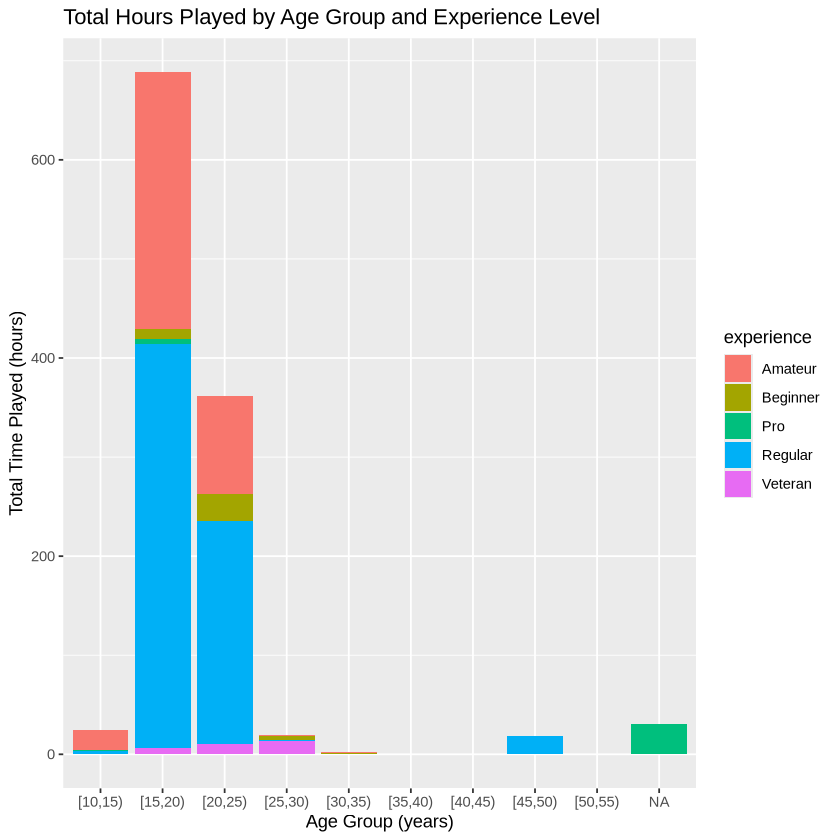

In [2]:
library(ggplot2)
library(dplyr)


players_data$age_group<-cut(players_data$age, 
                              breaks = seq(10, 70, by = 5),
                              right = FALSE)

players_table<-table(players_data$age_group) 

summarized_data <- players_data |>
  group_by(age_group, experience) |>
  summarise(total_hours = sum(played_hours, na.rm = TRUE))

hours_by_age<-ggplot(summarized_data, aes(x = age_group, y = total_hours, fill=experience)) +
  geom_bar(stat = "identity") +  
  labs(title = "Total Hours Played by Age Group and Experience Level", 
       x = "Age Group (years)", 
       y = "Total Time Played (hours)")
hours_by_age




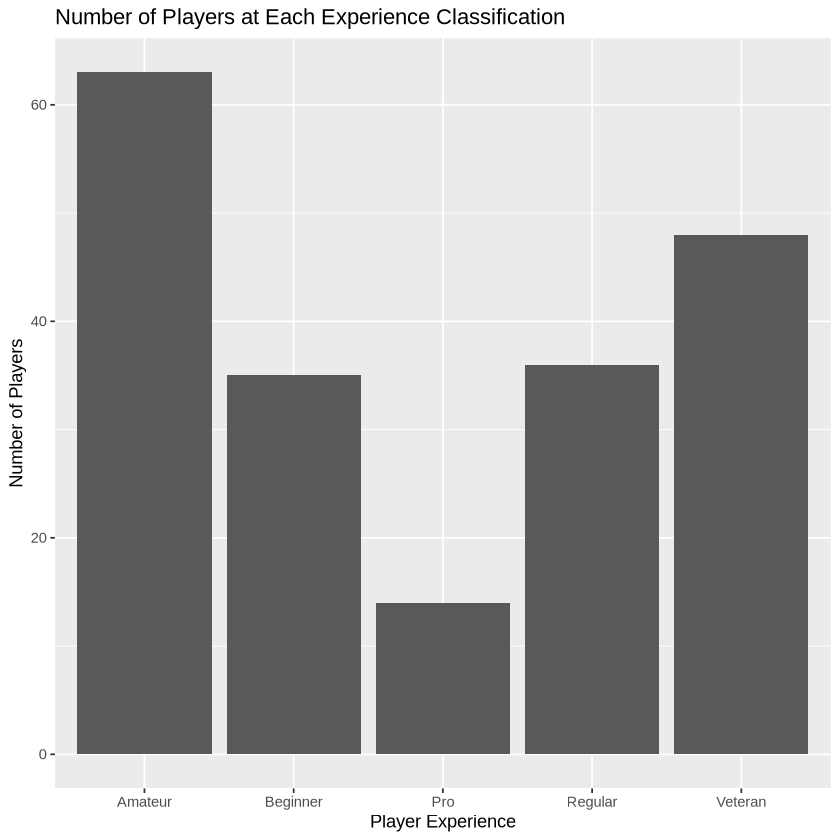

In [3]:
experience_counts<-players_data|>
count(experience)

experience_plot<-ggplot(experience_counts, aes(x=experience, y=n))+
geom_bar(stat="identity")+
labs(x="Player Experience",
     y="Number of Players",
    title="Number of Players at Each Experience Classification")

experience_plot

From the above bar plots I was able to explore the amount of time played by each age group, as well as the dispersal of experience amongst age groups and players. It is shown that players ages 15-20 contribute the most time to the server, and that the regular skill leveled players contribute the most out of any skill level, despite not having the largest number of players. It is important to note though that the majority of participants are in the age range of 15-20.  

**Methods and Plan**
-
We will likely use linear regression to answer the question as we are trying to predict a continuous variable based on a continuous and categorical variable. A linear model will work better with outliers than a knn model, and there are a couple points in the dataset which are much different than the mean, therefore our method will be able to account for this better.

We will have to assume that the ages and experience levels of the players are accurate for our analysis, we will also have to assume that both factors will have comparable impacts on the results. We will split the data into a training and testing set (likely 80% to 20%). We also have to assume that the relationship between the predictor variables and out target variable is linear.

If the relationship is not linear, a linear regression model will not be able to work well with the dataset, which would be quite problematic, in this case we might attempt a knn classification. 

We will use k-fold cross-validation to estimate the model's performance. We may also need to convert experience into a continuous variable rather than a categorical variable so that it is easier to use for the regression model. 